In [48]:
from tools import analysistools as atools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import random
from scipy.stats import sem
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.spatial import distance_matrix
import networkx as nx
import pickle

In [5]:
bsumm = None
nsumm = None
with open("/Users/joelforster/Projects/optidb/clus/budding.pickle", "rb") as f:
    bsumm = pickle.load(f)
    
with open("/Users/joelforster/Projects/optidb/clus/nonbudding.pickle", "rb") as f:
    nsumm = pickle.load(f)

In [25]:
df = pd.DataFrame()
data = []
bmsd = []
nmsd = []
for k,v in bsumm.iteritems():
    data.append((v['density'],v['clustering'],'budding'))
    bmsd = [bmsd[i]+t for i,t in enumerate(v['msd'])] if len(bmsd) > 0 else [t for i,t in enumerate(v['msd'])]
for k,v in nsumm.iteritems():
    data.append((v['density'],v['clustering'],'non budding'))
    nmsd = [nmsd[i]+t for i,t in enumerate(v['msd'])] if len(nmsd) > 0 else [t for i,t in enumerate(v['msd'])]

bmsd = [t/float(len(bsumm)) for t in bmsd]
nmsd = [t/float(len(nsumm)) for t in nmsd]

df = pd.DataFrame(data, columns = ['den' , 'cls', 'cat' ]) 
df.to_csv("/Users/joelforster/Projects/optidb/clus/traj.csv",index=False)

In [117]:
x = np.log10(range(len(bmsd))[3:])
y = np.log10(bmsd[3:])
z = np.polyfit(x, y,1)
bpoly = np.poly1d(z)

x = np.log10(range(len(nmsd))[3:])
y = np.log10(nmsd[3:])
z = np.polyfit(x, y, 1)
npoly = np.poly1d(z)

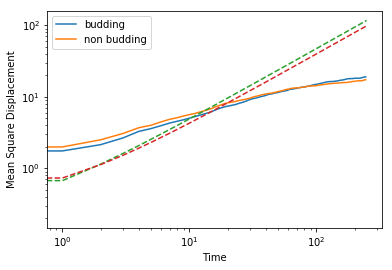

In [118]:
plt.loglog(bmsd[3:],label='budding')
plt.loglog(nmsd[3:],label='non budding')
plt.ylabel('Mean Square Displacement')
bxp = np.linspace(0, len(bmsd), len(bmsd))
nxp = np.linspace(0, len(nmsd), len(nmsd))
_ = plt.loglog( bxp, bpoly(bxp), '--', nxp, npoly(nxp), '--')
plt.xlabel('Time')
plt.legend()
plt.show()

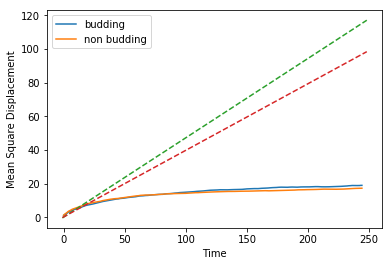

In [94]:
plt.plot(bmsd[3:],label='budding')
plt.plot(nmsd[3:],label='non budding')
bxp = np.linspace(-1, len(bmsd), len(bmsd))
nxp = np.linspace(-1, len(nmsd), len(nmsd))
_ = plt.plot( bxp, bpoly(bxp), '--', nxp, npoly(nxp), '--')
plt.ylabel('Mean Square Displacement')
plt.xlabel('Time')
plt.legend()
plt.show()

In [69]:
print npoly

            2
-0.0003351 x + 0.1268 x + 4.876


In [44]:
p(0.5)

2.2122442707930934